In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)
#plt.rcParams['set_minor_locator']=xminorLocator
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Time New Roman",
  "font.size": 8,
})

def cm2inch(value):
    return value/2.54

plt.rcParams['figure.figsize'] = (cm2inch(8), cm2inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=[-0.15,1.001],
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
levels=100
figureDPI=1200
figureType="jpeg"
timeUnit="fs"
dir='D:\\doc\\data\\twoPump\\'
outDir='D:\\doc\\data\\twoPump\\'


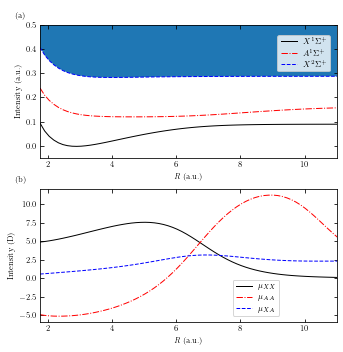

In [2]:
intDir="D:\\doc\\data\\twopump\\molecularData\\"

plt.figure(figsize=(cm2inch(12),cm2inch(12)))
ax=plt.subplot(2,1,1)
data=np.loadtxt(intDir+"PotentialEnergy.dat")
np.savetxt(outDir+"data\\f1(1)PotentialEnergy.dat",data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#plt.grid(False)
x=x
y=y3
setlabelm(ax,'(a)',[-0.1,1.001])
plt.xlabel('$\\textit{R}$ (a.u.)')
plt.ylabel("Intensity (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'b--')
plt.xlim(1.75,11)
plt.fill_between(x,y3,x,y3+0.2)
plt.ylim(-0.05,0.5)
plt.legend(['$X^1\\Sigma^+$','$A^1 \\Sigma ^+$','$X^2 \\Sigma ^+$'],loc=(0.8,0.65))
ax=plt.subplot(2,1,2)
data=np.loadtxt(intDir+"DipoleMoment.dat")
np.savetxt(outDir+"data\\f1(2)PotentialEnergy.dat",data)
x=data[:,0]
y=data[:,2]
setlabelm(ax,'(b)',[-0.1,1.001])
plt.xlabel("$\\textit{R}$  (a.u.)")
plt.ylabel("Intensity (D)")
plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-.',data[:,0],data[:,3],'b--')
plt.xlim(1.75,11)
plt.legend(["$\\mu_{XX} $","$\\mu_{AA} $","$\\mu_{XA} $"],loc=(0.65,0.05))
plt.tight_layout()
#plt.savefig(dir+"PotentialEnergyAndDipoleMent."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.savefig(outDir+"picture\\f1potDip."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

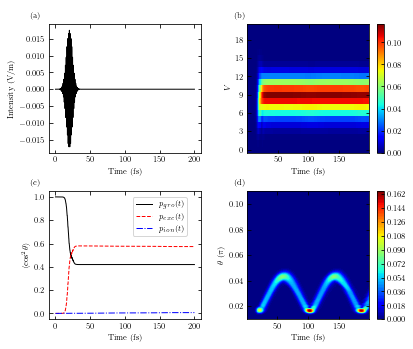

In [3]:
plt.figure(figsize=(16/2.54,13/2.54))
ax1=plt.subplot(2,2,1)
data=np.loadtxt("D:\\doc\\data\\onePump\\onepump1\\laser.dat")
x=data[:,0]
y=data[:,2]
# plt.xlim(0,5000)
plt.plot(x,y,'k')
plt.xlabel('Time (fs)')
plt.ylabel('Intensity (V/m)')
setlabel(ax1,'(a)')
np.savetxt(outDir+"data\\f2(12).dat",data,fmt="%.9f")
ax3=plt.subplot(2,2,3)
data=np.loadtxt("D:\\doc\\data\\onePump\\onepump1\\populationofstate.dat")
np.savetxt(outDir+"data\\f2(3).dat",data,fmt="%.9f")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
# plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.55,0.65))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
setlabel(ax3,'(c)')
plt.xlabel('Time (fs)')
plt.ylabel('$\\langle\\rm{cos^2}\\theta\\rangle$')
ax2=plt.subplot(2,2,2)
from matplotlib.ticker import MaxNLocator
setlabel(ax2,'(b)')
popexc = np.loadtxt("D:\\doc\\data\\ion1test\\onepump2\\p_exc_v.dat")
popgro = np.loadtxt("D:\\doc\\data\\ion1test\\onepump2\\p_vgr_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=popgro[:,0]
y=popgro[:,1]
z=popgro[:,2]
x2=popexc[:,0]
y2=popexc[:,1]
z2=popexc[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z2[(i-1)*ny+j-1]#+z2[(i-1)*ny+j-1]
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('$V$')
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,20.5)
plt.colorbar()
ax4=plt.subplot(2,2,4)
setlabel(ax4,'(d)')
data=np.loadtxt("D:\\doc\\data\\onePump\\onepump1\\ExcradWave.dat")
np.savetxt(outDir+"data\\f2(4).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]/180
z=data[:,2]
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
# plt.xlim(min(x),5000)
plt.xlabel("Time (fs)")
plt.ylabel("$\\theta$ ($\\pi$)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(outDir+'picture\\f2.'+figureType,bbox_inches ='tight',dpi=figureDPI)


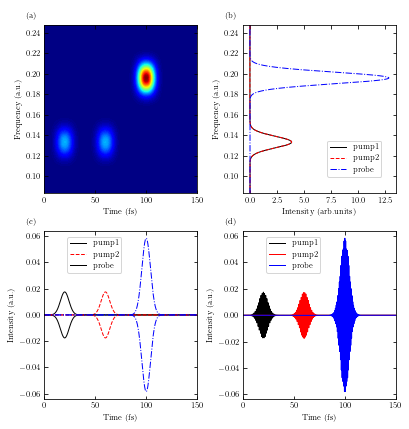

In [4]:
intDir="D:\\doc\\data\\ion1test\\twopump\\2060100\\"
legengLoc=(0.15,0.75)
plt.figure(figsize=((16/2.54),(13/2)))
#plt.figure(figsize=(8,6))
titleLoc="left"
ax1=plt.subplot(2,2,1)
setlabel(ax1,'(a)')
data=np.loadtxt(intDir+"TimFreDis4.dat")
np.savetxt(outDir+"data\\f3(1).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlabel("Time (fs)")
plt.ylabel("Frequency (a.u.)")
plt.tricontourf(x,y,z,100,cmap='jet')
#plt.colorbar()
ax2=plt.subplot(2,2,2)
setlabel(ax2,'(b)')
data1=np.loadtxt(intDir+"FreDis1.dat")
data2=np.loadtxt(intDir+"FreDis2.dat")
data3=np.loadtxt(intDir+"FreDis3.dat")
data4=np.loadtxt(intDir+"FreDis4.dat")
np.savetxt(outDir+"data\\f3(2).dat",data4,fmt="%.9f")
x1=data1[:,0]
y1=data1[:,1]
x2=data2[:,0]
y2=data2[:,1]
x3=data3[:,0]
y3=data3[:,1]
x4=data4[:,0]
y4=data4[:,1]
plt.xlabel("Intensity (arb.units)") 
plt.ylabel("Frequency (a.u.)")
#plt.xlim(0,5)
plt.ylim(min(np.loadtxt(intDir+"TimFreDis4.dat")[:,1]),max(np.loadtxt(intDir+"TimFreDis4.dat")[:,1]))
# plt.plot(y4,x4)
plt.plot(y1,x1,"k-",y2,x2,"r--",y3,x3,'b-.')
plt.legend(["pump1","pump2","probe"],loc=(0.55,0.1))
# plt.legend(["pump","probe"],loc=(0.6,0.1))
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
ax3=plt.subplot(2,2,3)
data=np.loadtxt(intDir+"Laser.dat")
# np.savetxt(dir+"data\\f3(34).dat",data,fmt="%.9f")
x=data[:,0]
y1=data[:,4]
y2=data[:,5]
y3=data[:,6]
plt.xlim(min(x),max(x))
setlabel(ax3,'(c)')
plt.plot(x,y1,'k-',x,y2,'r--',x,-y1,'k-',x,-y2,'r--',x,y3,'b-.',x,-y3,'b-.')
plt.xlabel("Time (fs)")
plt.ylabel("Intensity (a.u.)")
plt.legend(["pump1","pump2","probe"],loc=legengLoc)
# plt.legend(["pump1","pump2","probe"],loc=legengLoc)
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
ax4=plt.subplot(2,2,4)
setlabel(ax4,'(d)')
data=np.loadtxt(intDir+"Laser.dat")
x1=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
plt.xlim(min(x),max(x))
plt.xlabel("Time (fs)")
plt.ylabel("Intensity (a.u.)")

plt.plot(x1,y1,'k-',x1,y2,'r-',x,y3,'b-',)
plt.legend(["pump1","pump2",'probe'],loc=legengLoc)
# plt.legend(["pump","probe"],loc=legengLoc)
#plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.22)
plt.savefig(outDir+"picture\\f3TimeFrequencyDistribution."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

30
40
50
60
70
80
90
100
110


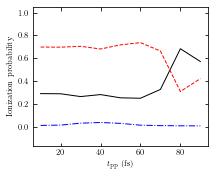

In [5]:
t=[]
p=[]
tp=[[]for i in range(4)]
for i in range(30,120,10):
    data=np.loadtxt('D:\\doc\\data\\ion1test\\twopump\\20'+str(i)+'\\populationofstate.dat')
    x=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]
    print(i)
    t.append(i)
    tp[0].append(i-20)
    tp[1].append(y1[-1])
    tp[2].append(y2[-1])
    tp[3].append(1-y1[-1]-y2[-1])
    
    p.append(max(y3))
plt.plot(tp[0],tp[1],'k-',tp[0],tp[2],'r--',tp[0],tp[3],'b-.')
plt.ylim(-0.17,1.05)
# ,markerfacecolor='b',markersize='5'
plt.xlabel("$t_{\\rm{pp}}$ (fs)")
plt.ylabel("Ionization probability")
plt.savefig(outDir+'picture\\f6pop.'+figureType,bbox_inches = 'tight',dpi=figureDPI)
np.savetxt(outDir+'data\\f6PopDelay.dat',tp)

$P_{ion}$ =  0.009704549999999923
$P_{ion}$ =  0.03282004999999988
$P_{ion}$ =  0.00905336999999995
$P_{ion}$ =  0.007762639999999987
48628
69730
87429
106828


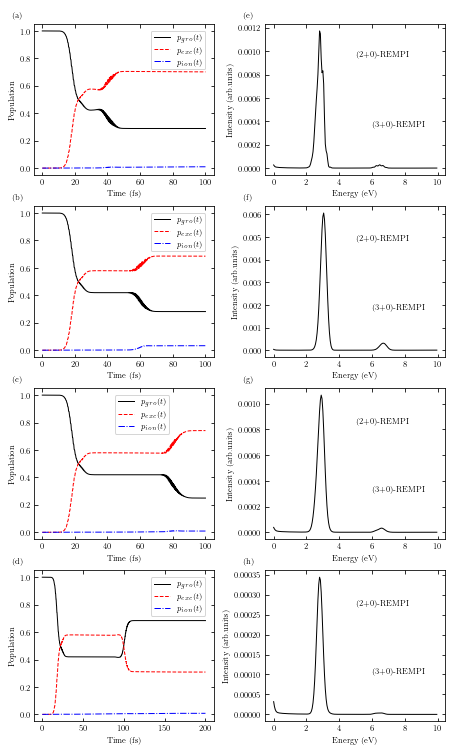

In [6]:
fig = plt.figure(tight_layout=True,figsize=(cm2inch(8*2),cm2inch(6.5*4)))
import matplotlib.gridspec as gridspec
intDir ='D:\\doc\\data\\ion1test\\twopump\\'
gs = gridspec.GridSpec(4, 2)
ax = fig.add_subplot(gs[0,0])
data=np.loadtxt(intDir+'20\\populationofstate.dat')
np.savetxt(outDir+'f7(1).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(a)')
# plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[1,0])
data=np.loadtxt(intDir+'40\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(2).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(b)')
# plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[2, 0])
data=np.loadtxt(intDir+'60\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(3).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(c)')
#plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.45,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[3,0])
data=np.loadtxt(intDir+'20100\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(4).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(d)')
#plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax= fig.add_subplot(gs[0,1])
data=np.loadtxt(intDir+'20\\timeenergyspctra.dat')
np.savetxt(dir+'data\\f7(5).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(e)')
#plt.text(0.3*(max(x)-min(x)),0.5*(max(y)-min(y)),'(0+2)-REMPI')
plt.text(0.5*(max(x)-min(x)),0.8*(max(y)-min(y)),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[1,1])
data=np.loadtxt(intDir+'40\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(6).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(f)')
plt.text(0.5*(max(x)-min(x)),0.8*(max(y)-min(y)),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[2,1])
data=np.loadtxt(intDir+'60\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(7).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(g)')
plt.text(0.5*(max(x)-min(x)),0.8*(max(y)-min(y)),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[3,1])
data=np.loadtxt(intDir+'20100\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(8).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(h)')
plt.text(0.5*(max(x)-min(x)),0.8*(max(y)-min(y)),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig(outDir+'picture\\f7popenetgy.'+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

$P_{ion}$ =  0.60479597
$P_{ion}$ =  0.64234139
$P_{ion}$ =  0.66809068
$P_{ion}$ =  0.49100303
141508
140308
136807
139507


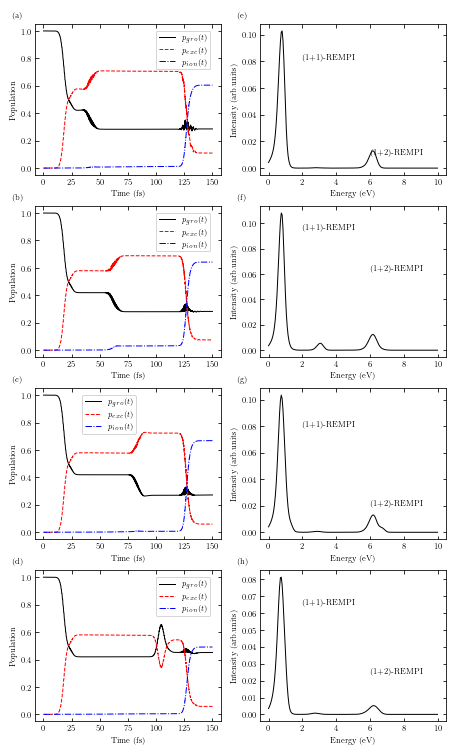

In [7]:
fig = plt.figure(tight_layout=True,figsize=(cm2inch(8*2),cm2inch(6.5*4)))
import matplotlib.gridspec as gridspec
subdir="D:\\doc\\data\\twopumpOneprobe\\"
gs = gridspec.GridSpec(4, 2)
ax = fig.add_subplot(gs[0,0])
data=np.loadtxt(subdir+'2041130\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(1).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(a)')
# plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[1,0])
data=np.loadtxt(subdir+'2062130\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(2).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(b)')
# plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[2, 0])
data=np.loadtxt(subdir+'2083130\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(3).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(c)')
#plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.25,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax = fig.add_subplot(gs[3,0])
data=np.loadtxt(subdir+'20104130\\populationofstate.dat')
np.savetxt(outDir+'data\\f7(4).dat', data)
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
setlabel(ax,'(d)')
#plt.xlim(1620,1680)
plt.legend(["$p_{gro}(t)$","$p_{exc}(t)$","$p_{ion}(t)$"],loc=(0.65,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
ax= fig.add_subplot(gs[0,1])
data=np.loadtxt(subdir+'2041130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(5).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(e)')
#plt.text(0.3*(max(x)-min(x)),0.5*(max(y)-min(y)),'(0+2)-REMPI')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.1*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[1,1])
data=np.loadtxt(subdir+'2062130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(6).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(f)')
plt.text(0.2*(max(x)-min(x)),0.9*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.6*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[2,1])
data=np.loadtxt(subdir+'2083130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(7).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(g)')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[3,1])
data=np.loadtxt(subdir+'20104130\\timeenergyspctra.dat')
np.savetxt(dir+'data\\f7(8).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
# plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(h)')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig(outDir+'picture\\f71popenetgy.'+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

117000
117000
117000
117000
141508
140308
136807
139507


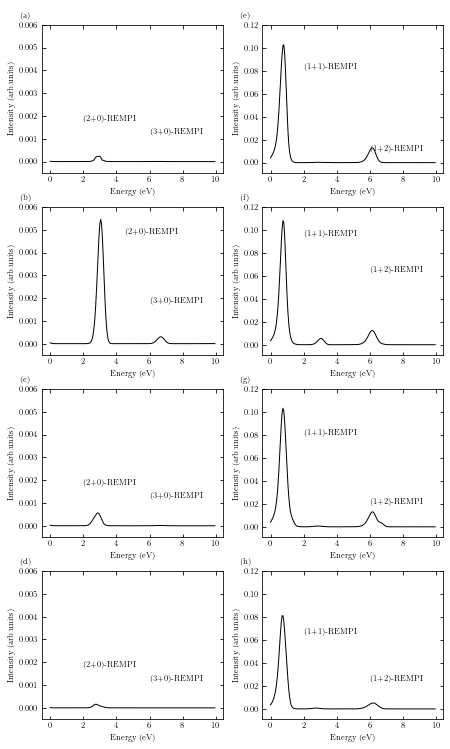

In [8]:
fig = plt.figure(tight_layout=True,figsize=(cm2inch(8*2),cm2inch(6.5*4)))
import matplotlib.gridspec as gridspec
subdir="D:\\doc\\data\\twopumpOneprobe\\"
gs = gridspec.GridSpec(4, 2)
ax= fig.add_subplot(gs[0,0])
data=np.loadtxt(subdir+'2041130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(5).dat', data)
l=int(117/150*len(data[:,2]))
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.0005, 0.006)
plt.plot(x1,y1,'k')
setlabel(ax,'(a)')
#plt.text(0.3*(max(x)-min(x)),0.5*(max(y)-min(y)),'(0+2)-REMPI')
plt.text(0.2*(max(x)-min(x)),0.3*(0.006),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(0.006),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[1,0])
data=np.loadtxt(subdir+'2062130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(6).dat', data)
l=int(117/150*len(data[:,2]))
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.0005, 0.006)
plt.plot(x1,y1,'k')
setlabel(ax,'(b)')
plt.text(0.45*(max(x)-min(x)),0.8*(0.006),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(0.006),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[2,0])
data=np.loadtxt(subdir+'2083130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(7).dat', data)
l=int(117/150*len(data[:,2]))
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.0005, 0.006)
plt.plot(x1,y1,'k')
setlabel(ax,'(c)')
plt.text(0.2*(max(x)-min(x)),0.3*(0.006),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(0.006),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[3,0])
data=np.loadtxt(subdir+'20104130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(8).dat', data)
l=int(117/150*len(data[:,2]))
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.0005, 0.006)
plt.plot(x1,y1,'k')
setlabel(ax,'(d)')
plt.text(0.2*(max(x)-min(x)),0.3*(0.006),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(0.006),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[0,1])
data=np.loadtxt(subdir+'2041130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(5).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(e)')
#plt.text(0.3*(max(x)-min(x)),0.5*(max(y)-min(y)),'(0+2)-REMPI')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.1*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[1,1])
data=np.loadtxt(subdir+'2062130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(6).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(f)')
plt.text(0.2*(max(x)-min(x)),0.9*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.6*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[2,1])
data=np.loadtxt(subdir+'2083130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(7).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(g)')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
ax= fig.add_subplot(gs[3,1])
data=np.loadtxt(subdir+'20104130\\timeenergyspctra.dat')
np.savetxt(outDir+'data\\f7(8).dat', data)
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
setlabel(ax,'(h)')
plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.3*(max(y)-min(y)),'(1+2)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig(outDir+'picture\\f71popenetgy.'+figureType,bbox_inches = 'tight',dpi=figureDPI)

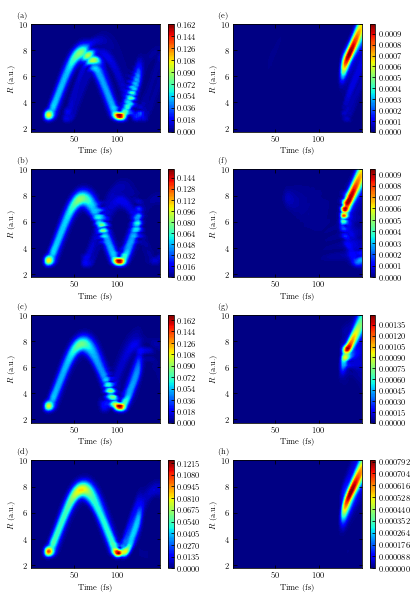

In [9]:
plt.figure(figsize=(16/2.54,24/2.54))
titleLoc="left"
intDir="D:\\doc\\data\\twoPumpOneprobe\\2041130\\"

ax=plt.subplot(4,2,1)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(outDir+"data\\f8(1)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(a)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
# data=np.loadtxt(dir+"data\\f1(2)PotentialEnergy.dat")
# x=data[:,0]
# y=data[:,3]
# plt.plot(y,-x)
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,2)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(outDir+"data\\f8(2)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(e)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")

intDir="D:\\doc\\data\\twoPumpOneprobe\\2062130\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,3)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(outDir+"data\\f8(3)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(b)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,4)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(outDir+"data\\f8(4)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(f)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")

intDir="D:\\doc\\data\\twoPumpOneprobe\\2083130\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,5)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(outDir+"data\\f8(5)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(c)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,6)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(outDir+"data\\f8(6)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(g)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")


intDir="D:\\doc\\data\\twoPumpOneprobe\\20104130\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,7)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(outDir+"data\\f8(7)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(d)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,8)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(outDir+"data\\f8(8)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(h)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
plt.savefig(outDir+"picture\\f8ExcIonRad."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)

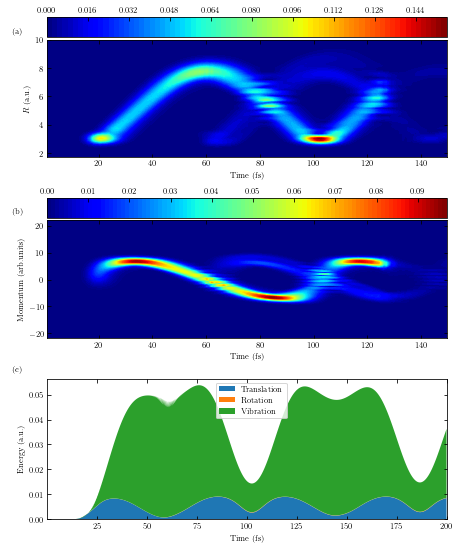

In [10]:
fig = plt.figure(tight_layout=True,figsize=(cm2inch(8*2),cm2inch(6.5*3)))
intDir="D:\\doc\\data\\twopumponeprobe\\2062130\\"
ax=plt.subplot(3,1,1)
data=np.loadtxt(intDir+"excradwave.dat")
np.savetxt(outDir+"data\\f9(1).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlabel("Time (fs)")
plt.ylabel("$R$ (a.u.)")
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar(pad=0.02,location='top')
setlabelm(ax,'(a)',[-0.1,1.001])
# plt.xlim(0,150)
plt.ylim(min(y),10)
ax=plt.subplot(3,1,2)
data=np.loadtxt(intDir+'ktot.dat')
np.savetxt(outDir+"data\\f9(2).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
z4=z1+z2+z3

plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar(pad=0.015,location='top')
setlabelm(ax,'(b)',[-0.1,1.001])
plt.xlabel('Time (fs)')
plt.ylabel('Momentum (arb.units)')
ax=plt.subplot(3,1,3)

data=np.loadtxt('D:\\doc\\data\\ion1test\\twopump\\2060\\eneTRJVexc.dat')
np.savetxt(outDir+"data\\f9(3).dat",data,fmt="%.9f")
t = data[:,0]
population_by_continent = {
    'Translation': data[:,1],
    'Rotation':    data[:,2],
    'Vibration':   data[:,3],
}
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
ax.legend(loc='best', bbox_to_anchor=(0.51, 0.9, 0.1, 0.1))
#ax.set_title('World population')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Energy (a.u.)')
# plt.colorbar(pad=0.01,visible=False)
plt.xlim(min(t),max(t))
setlabelm(ax,'(c)',[-0.1,1.001])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig(outDir+'picture\\f9pumpExcRadWave.'+figureType,bbox_inches = 'tight',dpi=figureDPI)

$P_{ion}$ =  0.024486899999999978
78629


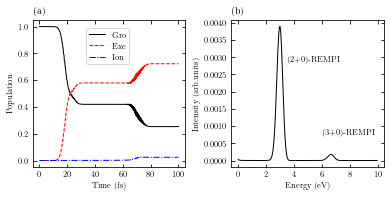

In [11]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16/2.54,6.5/2.54))

intDir="D:\\doc\\data\\ion1test\\twopump\\50\\"
plt.subplot(1,2,1)
data=np.loadtxt(intDir+'populationofstate.dat')
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=1-y1-y2
print('$P_{ion}$ = ',y3[-1])
plt.plot(x,y1,'k-',x,y2,'r--',x,y3,'b-.')
plt.title("(a)",loc='left')
# plt.xlim(1620,1680)
plt.legend(["Gro","Exc","Ion"],loc=(0.35,0.7))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")

plt.subplot(1,2,2)
data=np.loadtxt(intDir+'timeenergyspctra.dat')
l=np.argmax(data[:,2])
x=data[l-10:l+90,1]
print(l)
y=data[l-10:l+90,2]
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
#plt.ylim(-0.009, 0.12)
plt.plot(x1,y1,'k')
plt.title("(b)",loc='left')
# plt.text(0.3*(max(x)-min(x)),0.5*(max(y)-min(y)),'(0+2)-REMPI')
# plt.text(0.2*(max(x)-min(x)),0.8*(max(y)-min(y)),'(1+1)-REMPI')
plt.text(0.35*(max(x)-min(x)),0.75*(max(y)-min(y)),'(2+0)-REMPI')
plt.text(0.6*(max(x)-min(x)),0.2*(max(y)-min(y)),'(3+0)-REMPI')
# plt.text(0.6*(max(x)-min(x)),0.2*(max(y)-min(y)),'(3+0)-REMPI')
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb.units)")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)
plt.savefig(outDir+'popene'+intDir[-3:-1]+'.'+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)

0
1
2
3
4
5
6
7


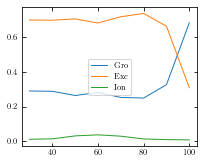

In [12]:
tp=[[]for i in range(4)]
for i in range(0,8,1):
    print(i)
    workdir='D:\\doc\\data\\ion1test\\twopump\\20'+str(i*10+30)+'\\PopulationOfState.dat'
    data=np.loadtxt('D:\\doc\\data\\ion1test\\twopump\\20'+str(i*10+30)+'\\PopulationOfState.dat')
    # x[i]=i*10+30
    tp[0].append(i*10+30)
    l=len(data[:,1])
    tp[1].append(max(data[1500:1900,1]))
    tp[2].append(max(data[int(l*3/4):l-1,2]))
    tp[3].append(max(data[int(l*3/4):l-1,3]))
plt.plot(tp[0],tp[1],tp[0],tp[2],tp[0],tp[3])
plt.legend(["Gro","Exc","Ion"],loc=0)
     

17976
[6.76320717e-07 6.76320717e-07 8.65673058e-07 8.65673058e-07
 1.13062829e-06 1.13062829e-06 1.50026939e-06 1.50026939e-06
 1.97863629e-06 1.97863629e-06 2.53650136e-06 2.53650136e-06
 3.11708221e-06 3.11708221e-06 3.65227681e-06 3.65227681e-06
 4.08155047e-06 4.08155047e-06 4.36588020e-06 4.36588020e-06
 4.49272255e-06 4.49272255e-06 4.47229068e-06 4.47229068e-06
 4.32853877e-06 4.32853877e-06 4.08926074e-06 4.08926074e-06
 3.77874180e-06 3.77874180e-06 3.41433036e-06 3.41433036e-06
 3.00633173e-06 3.00633173e-06 2.55973119e-06 2.55973119e-06
 2.07656727e-06 2.07656727e-06 1.55851514e-06 1.55851514e-06
 1.00949006e-06 1.00949006e-06 4.38213751e-07 4.38213751e-07]


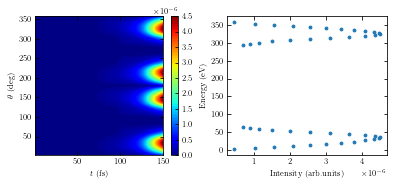

In [13]:
plt.figure(figsize=(16/2.54,6.5/2.54))
intDir="D:\\doc\\data\\ion1test\\twoPump\\2060100\\"
plt.subplot(1,2,1)
data =np.loadtxt(intDir+"absang.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$t$ ("+timeUnit+")")
plt.ylabel("$\\theta$ (deg)")
plt.subplot(1,2,2)
data =np.loadtxt(intDir+"absang.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
l=np.argmax(data[:,2])
x=data[l-20:l+100,1]

print(l)
y=data[l-20:l+100,2]
abs(y)
print(y)
x1=np.arange(min(x),max(x),(max(x)-min(x))/200)
from scipy import interpolate
y1=interpolate.interp1d(x,y,kind='cubic')(x1)
#plt.ylim(0,10)
#plt.xlim(-0.009, 0.1)
plt.scatter(y,x,8)
# plt.text(0.3*(max(y)-min(y)),0.6*(max(x)-min(x)),'(1+2)-REMPI')
# plt.text(0.6*(max(y)-min(y)),0.2*(max(x)-min(x)),'(1+1)-REMPI')
#interpolation='spline16'
plt.ylabel("Energy (eV)")
plt.xlabel("Intensity (arb.units)")
plt.savefig(outDir+"timeenergyspctraplustimeend."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

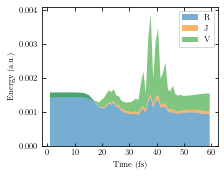

In [14]:
data=np.loadtxt('D:\\Doc\\data\\ion1test\\2040\\eneTRJV.dat')
t = data[:,0]

population_by_continent = {
    'R': data[:,1],
    'J':  data[:,2],
    'V':  data[:,3],
}

fig, ax = plt.subplots()
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.6)
ax.legend(loc=0)
#ax.set_title('World population')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Energy (a.u.)')
plt.savefig(outDir+'EnergyRJV.'+figureType,bbox_inches ='tight',dpi=figureDPI)
plt.show()

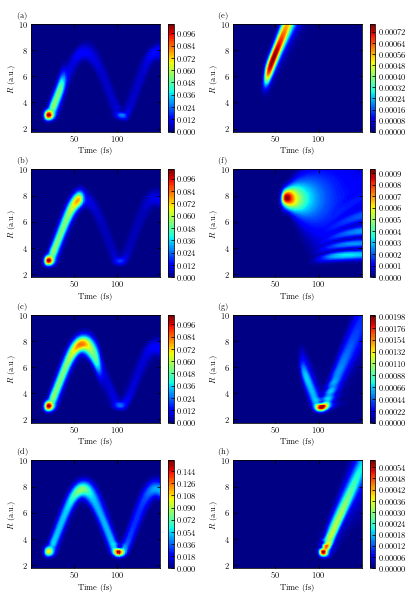

In [15]:
plt.figure(figsize=(16/2.54,24/2.54))
titleLoc="left"
intDir="D:\\doc\\data\\ion1test\\delayPumpAndProbe\\21\\"

ax=plt.subplot(4,2,1)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(dir+"data\\f8(1)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(a)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
# data=np.loadtxt(dir+"data\\f1(2)PotentialEnergy.dat")
# x=data[:,0]
# y=data[:,3]
# plt.plot(y,-x)
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,2)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(dir+"data\\f8(2)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(e)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")

intDir="D:\\doc\\data\\ion1test\\delayPumpAndProbe\\42\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,3)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(dir+"data\\f8(3)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(b)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,4)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(dir+"data\\f8(4)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(f)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")

intDir="D:\\doc\\data\\ion1test\\delayPumpAndProbe\\63\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,5)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(dir+"data\\f8(5)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(c)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,6)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(dir+"data\\f8(6)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(g)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")


intDir="D:\\doc\\data\\ion1test\\delayPumpAndProbe\\84\\"
#plt.figure(figsize=(12,6))
ax=plt.subplot(4,2,7)
data =np.loadtxt(intDir+"ExcRadWave.dat")
np.savetxt(dir+"data\\f8(7)ExcRadWave.dat", data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
setlabel(ax,'(d)')
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
ax=plt.subplot(4,2,8)
data =np.loadtxt(intDir+"IonRadWave.dat")
np.savetxt(dir+"data\\f8(8)IonRadWave.dat",data)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
#plt.xlim(TimeTurn,TimeEnd)
plt.ylim(1.75,10.0)
setlabel(ax,'(h)')
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar()
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("$R$ (a.u.)")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
plt.savefig(dir+"picture\\f8ExcIonRad."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)

In [16]:
os.startfile(dir)

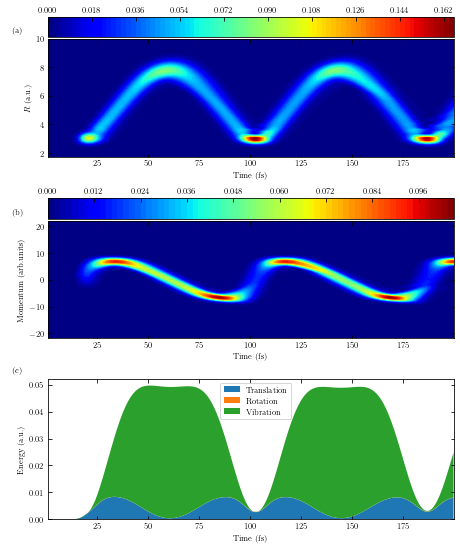

In [17]:
fig = plt.figure(tight_layout=True,figsize=(cm2inch(8*2),cm2inch(6.5*3)))
intDir="D:\\doc\\data\\onepump\\onepump200\\"
ax=plt.subplot(3,1,1)
data=np.loadtxt(intDir+"excradwave.dat")
np.savetxt(dir+"data\\f9(1).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlabel("Time (fs)")
plt.ylabel("$R$ (a.u.)")
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar(pad=0.01,location='top')
setlabelm(ax,'(a)',[-0.1,1.001])
# plt.xlim(0,150)
plt.ylim(min(y),10)
ax=plt.subplot(3,1,2)
data=np.loadtxt(intDir+'ktot.dat')
np.savetxt(dir+"data\\f9(2).dat",data,fmt="%.9f")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
z4=z1+z2+z3

plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar(pad=0.015,location='top')
setlabelm(ax,'(b)',[-0.1,1.001])
plt.xlabel('Time (fs)')
plt.ylabel('Momentum (arb.units)')
ax=plt.subplot(3,1,3)

data=np.loadtxt('D:\\doc\\data\\onePump\\onepump200\\eneTRJVexc.dat')
np.savetxt(dir+"data\\f9(3).dat",data,fmt="%.9f")
t = data[:,0]
population_by_continent = {
    'Translation': data[:,1],
    'Rotation':    data[:,2],
    'Vibration':   data[:,3],
}
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=1)
ax.legend(loc='best', bbox_to_anchor=(0.51, 0.9, 0.1, 0.1))
#ax.set_title('World population')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Energy (a.u.)')
# plt.colorbar(pad=0.01,visible=False)
plt.xlim(min(t),max(t))
setlabelm(ax,'(c)',[-0.1,1.001])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig(dir+'picture\\f9pumpExcRadWave.'+figureType,bbox_inches = 'tight',dpi=figureDPI)

In [18]:
# plt.figure(figsize=(32/2.54,26/2.54))
# intDir='D:\\doc\\data\\ion1test\\2040\\'
# fig = plt.figure(constrained_layout=True)
# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(3, 3)
# data=np.loadtxt(intDir+'kpos.dat')
# x=data[:,0]
# y=data[:,1]
# z1=data[:,2]
# z2=data[:,3]
# z3=data[:,4]
# ax11 = fig.add_subplot(gs[0,0])
# ax11.tricontourf(x,y,z1,levels,cmap='jet')
# plt.ylim(-5.5,max(y))
# plt.xlabel("Time (fs)")
# plt.ylabel("Momentum (a.u.)")
# ax21 = fig.add_subplot(gs[0,1],sharex=ax11, sharey=ax11)
# ax21.tricontourf(x,y,z2,levels,cmap='jet')
# ax31 = fig.add_subplot(gs[0,2],sharex=ax11, sharey=ax11)
# ax31.tricontourf(x,y,z3,levels,cmap='jet')

# data=np.loadtxt(intDir+'kneg.dat')
# x=data[:,0]
# y=data[:,1]
# z1=data[:,2]
# z2=data[:,3]
# z3=data[:,4]
# ax12 = fig.add_subplot(gs[1,0],sharex=ax11)
# ax12.tricontourf(x,y,z1,levels,cmap='jet')
# ax22 = fig.add_subplot(gs[1,1],sharex=ax11)
# ax22.tricontourf(x,y,z2,levels,cmap='jet')
# ax32 = fig.add_subplot(gs[1,2],sharex=ax11)
# ax32.tricontourf(x,y,z3,levels,cmap='jet')
# # plt.ylim(min(y),5.5)

# data=np.loadtxt(intDir+'ktot.dat')
# x=data[:,0]
# y=data[:,1]
# z1=data[:,2]
# z2=data[:,3]
# z3=data[:,4]
# ax13= fig.add_subplot(gs[2,0],sharex=ax11)
# ax13.tricontourf(x,y,z1,levels,cmap='jet')
# ax23= fig.add_subplot(gs[2,1],sharex=ax11)
# ax23.tricontourf(x,y,z2,levels,cmap='jet')
# ax33= fig.add_subplot(gs[2,2],sharex=ax11)
# ax33.tricontourf(x,y,z3,levels,cmap='jet')
# #plt.ylim(-5.5,5.5)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.3, 
#                     hspace=0.3)
# plt.savefig(outDir+'K.'+figureType,bbox_inches ='tight',dpi=figureDPI)

# plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3544\3826239482.py:34: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.1,


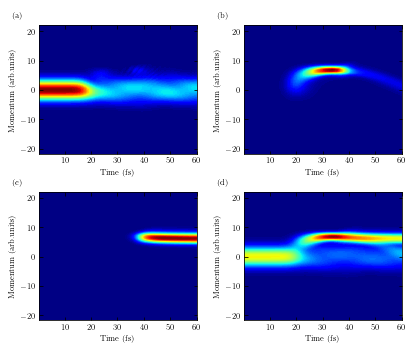

In [19]:

import matplotlib.gridspec as gridspec
fig=plt.figure(figsize=(8*2/2.54,13/2.54),constrained_layout=True)
intDir='D:\\doc\\data\\ion1test\\2040\\'
#fig = plt.figure()
gs = gridspec.GridSpec(2, 2)
data=np.loadtxt(intDir+'ktot.dat')
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
z3=data[:,4]
z4=z1+z2+z3
ax1= fig.add_subplot(gs[0,0])
ax1.tricontourf(x,y,z1,levels,cmap='jet')
setlabelm(ax1,"(a)",[-0.2,1.01])
plt.xlabel("Time (fs)")
plt.ylabel("Momentum (arb.units)")
ax2= fig.add_subplot(gs[0,1],sharex=ax1,sharey=ax1)
ax2.tricontourf(x,y,z2,levels,cmap='jet')
setlabelm(ax2,"(b)",[-0.2,1.01])
plt.xlabel("Time (fs)")
plt.ylabel("Momentum (arb.units)")
ax3= fig.add_subplot(gs[1,0],sharex=ax1,sharey=ax1)
ax3.tricontourf(x,y,z3,levels,cmap='jet')
setlabelm(ax3,"(c)",[-0.2,1.01])
plt.xlabel("Time (fs)")
plt.ylabel("Momentum (arb.units)")
ax4= fig.add_subplot(gs[1,1],sharex=ax1,sharey=ax1)
ax4.tricontourf(x,y,z4,levels,cmap='jet')
setlabelm(ax4,"(d)",[-0.2,1.01])
plt.xlabel("Time (fs)")
plt.ylabel("Momentum (arb.units)")
#plt.ylim(-5.5,5.5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(outDir+'K.'+figureType,bbox_inches ='tight',dpi=figureDPI)

plt.show()

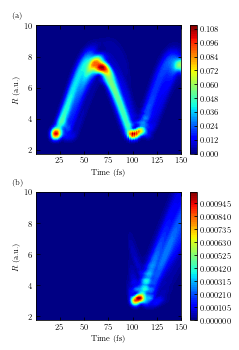

In [20]:

titleLoc='left'
plt.figure(figsize=(8/2.54,13/2.54))
for i in range(0,1,1):
    data1=np.loadtxt('D:\\doc\\data\\ion1test\\twopump\\20'+str(i+3)+'0100\\Excradwave.dat')
    data2=np.loadtxt('D:\\doc\\data\\ion1test\\twopump\\20'+str(i+3)+'0100\\Ionradwave.dat')
    ax1=plt.subplot(2,1,1)
    x=data1[:,0]
    y=data1[:,1]
    z=data1[:,2]
    setlabelm(ax1,"(a)",[-0.2,1.01])
    #plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    ax2=plt.subplot(2,1,2)
    x=data2[:,0]
    y=data2[:,1]
    z=data2[:,2]
    setlabelm(ax2,"(b)",[-0.2,1.01])
    #plt.xlim(TimeTurn,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
    figName=outDir+'ExcIonradWave20'+str(i+3)+'0100.'+figureType
    plt.savefig(figName,bbox_inches='tight',dpi=figureDPI)
